In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 1760
Rows in test set: 440



In [9]:
train_set.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1656,17,16,14,16.396243,92.181519,6.625539,102.944161,orange
752,37,79,19,27.543848,69.347863,7.143943,69.408782,blackgram
892,7,73,25,27.521856,63.132153,7.288057,45.208411,lentil
1041,101,70,48,25.360592,75.031933,6.012697,116.553146,banana
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,mango


In [10]:
test_set.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,watermelon
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,papaya
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,apple


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBC873D508>,
      dtype=object)

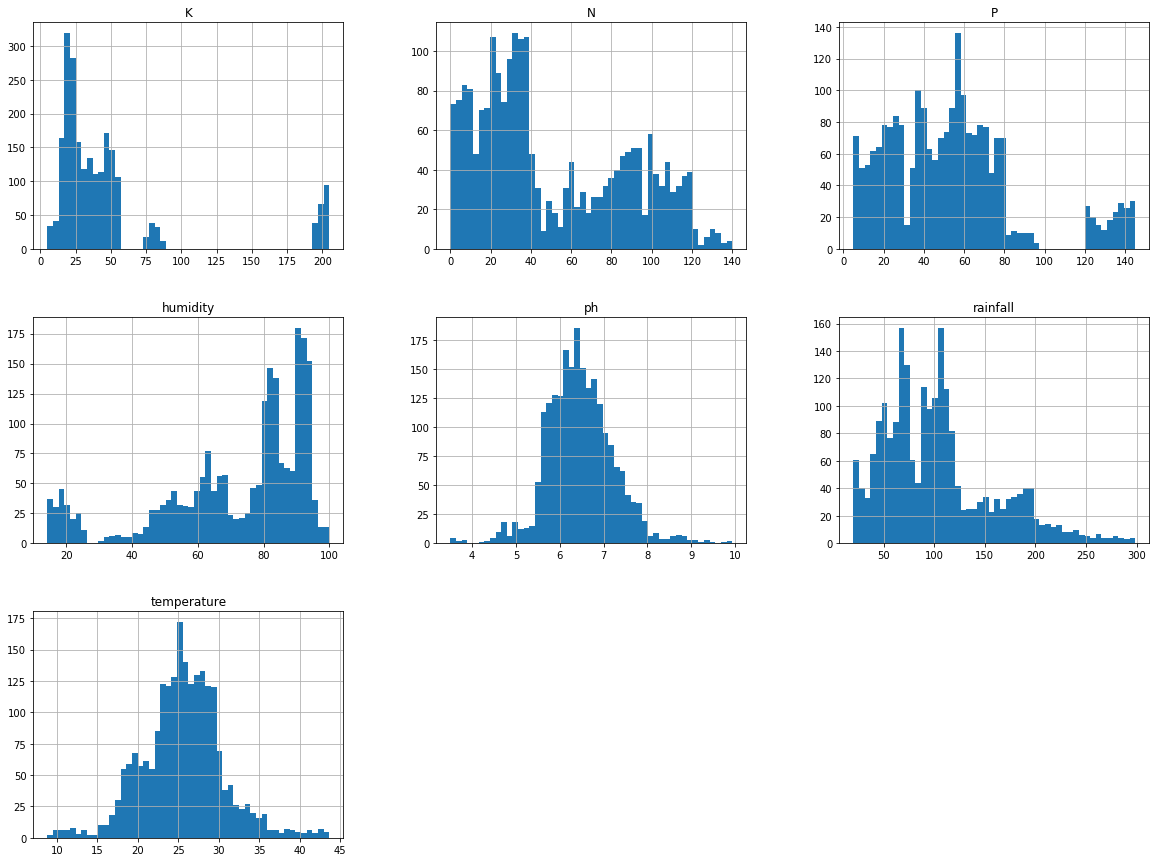

In [11]:
df.hist(bins=50,figsize=(20,15))

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
#scaling the features
# 1)min max scaling
#     (value-min)/(max-min)
#     we can use min-maxScaler
# 2)standardization
#     (value-mean)/std
#     we can use StandardScaler for this

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [15]:
my_pipeline=Pipeline([
#     ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [16]:
train_set_label=train_set["label"].copy()
train_set.drop('label', inplace=True, axis=1)

C:\Users\Captain\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
train_set.head()

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553146
1179,0,17,30,35.474783,47.972305,6.279134,97.790725


In [18]:
train_set_label.head()

1656       orange
752     blackgram
892        lentil
1041       banana
1179        mango
Name: label, dtype: object

In [19]:
test_set_label=test_set["label"].copy()
test_set.drop('label', inplace=True, axis=1)

In [20]:
train_set=my_pipeline.fit_transform(train_set)

In [21]:
train_set

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [22]:
# df_label.head()

In [23]:
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression

In [24]:
model=svc()
mod=LogisticRegression()

In [25]:
model.fit(train_set,train_set_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
mod.fit(train_set,train_set_label)

C:\Users\Captain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Captain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
test_set=my_pipeline.fit_transform(test_set)

In [28]:
model.score(test_set,test_set_label)

0.9590909090909091

In [29]:
mod.score(test_set,test_set_label)

0.9295454545454546

In [30]:
test_set[2]

array([0.25421252, 0.27579609, 0.01636317, 3.55194693, 0.95636671,
       0.64209145, 0.14771821])

In [31]:
model.predict(([[0.25421252, 0.27579609, 0.01636317, 3.55194693, 0.95636671,
       0.64209145, 0.14771821]]))

array(['papaya'], dtype=object)

In [32]:
from joblib import dump,load

In [33]:
dump(model,"Crop.joblib")

['Crop.joblib']